# DATASET DO PROJETO
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **Temperatura média** (°C)
- **Consumo de cerveja** (litros)


---

### Utilizando a célula abaixo para importar as biblioteca que precisar para executar as tarefas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

### Importando o dataset

In [ ]:
caminho = 'https://raw.githubusercontent.com/bruno-kalel/linear_regression_beer_consumption_sao_paulo/main/beer_consumption_sao_paulo.csv'

In [ ]:
dados = pd.read_csv(caminho)

### Visualizando o conteúdo do DataFrame

In [ ]:
dados.head(10)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


### Renomeando as colunas para mais fácil identificação das variáveis independentes e dependentes

In [ ]:
dados.columns = dados.columns.str.lower().str.replace(' ', '_').str.replace('[()]', '', regex=True)
dados.columns

Index(['data', 'temperatura_media_c', 'temperatura_minima_c',
       'temperatura_maxima_c', 'precipitacao_mm', 'final_de_semana',
       'consumo_de_cerveja_litros'],
      dtype='object')

In [ ]:
renomear = {'temperatura_media_c':'X', 'consumo_de_cerveja_litros':'Y'}

In [ ]:
dados = dados.rename(columns=renomear)
dados.columns

Index(['data', 'X', 'temperatura_minima_c', 'temperatura_maxima_c',
       'precipitacao_mm', 'final_de_semana', 'Y'],
      dtype='object')

### Filtrando o DataFrame apenas com as variáveis independentes e dependentes

In [ ]:
colunas = ['X', 'Y']

In [ ]:
dados = dados[colunas]
dados.head(10)

,X,Y
0,"27,3",25.461
1,"27,02",28.972
2,"24,82",30.814
3,"23,98",29.799
4,"23,82",28.900
5,"23,78",28.218
6,24,29.732
7,"24,9",28.397
8,"28,2",24.886
9,"26,76",37.937


### Identicando e removendo os valores nulos

In [ ]:
dados.tail(10)

,X,Y
931,NaN,NaN
932,NaN,NaN
933,NaN,NaN
934,NaN,NaN
935,NaN,NaN
936,NaN,NaN
937,NaN,NaN
938,NaN,NaN
939,NaN,NaN
940,NaN,NaN


In [ ]:
dados.isna().sum()

X    576
Y    576
dtype: int64

In [ ]:
dados.drop(dados.tail(576).index).isna().sum()

X    0
Y    0
dtype: int64

In [ ]:
dados = dados.drop(dados.tail(576).index)
dados.isna().sum()

X    0
Y    0
dtype: int64

### Verificando e converterdo os tipos de variáveis das Series onde necessário

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       365 non-null    object 
 1   Y       365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
dados.Y.head(10)

0    25.461
1    28.972
2    30.814
3    29.799
4    28.900
5    28.218
6    29.732
7    28.397
8    24.886
9    37.937
Name: Y, dtype: float64

In [ ]:
dados.Y = dados.Y * 1000
dados.Y.head(10)

0    25461.0
1    28972.0
2    30814.0
3    29799.0
4    28900.0
5    28218.0
6    29732.0
7    28397.0
8    24886.0
9    37937.0
Name: Y, dtype: float64

In [ ]:
dados.X.head(10)

0     27,3
1    27,02
2    24,82
3    23,98
4    23,82
5    23,78
6       24
7     24,9
8     28,2
9    26,76
Name: X, dtype: object

In [ ]:
dados.X = dados.X.str.replace(',', '.')
dados.X.head(10)

0     27.3
1    27.02
2    24.82
3    23.98
4    23.82
5    23.78
6       24
7     24.9
8     28.2
9    26.76
Name: X, dtype: object

In [ ]:
dados.X = dados.X.astype(np.float64)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       365 non-null    float64
 1   Y       365 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


### Obtendo e avaliando as estatísticas descritivas dos dados

In [ ]:
dados.describe()

,X,Y
count,365.000000,365.000000
mean,21.226356,25401.367123
std,3.180108,4399.142703
min,12.900000,14343.000000
25%,19.020000,22008.000000
50%,21.380000,24867.000000
75%,23.280000,28631.000000
max,28.860000,37937.000000


### Análise gráfica
### Construindo um box plot para cada variável do dataset

Text(0.5, 0, 'Litros')

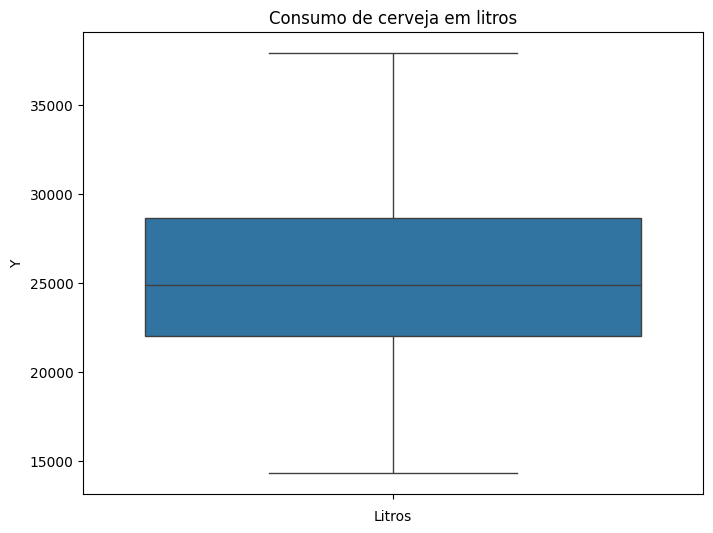

In [ ]:
ax = sns.boxplot(dados.Y)
ax.figure.set_size_inches(8, 6)
ax.set_title('Consumo de cerveja em litros')
ax.set_xlabel('Litros')

Text(0.5, 0, 'Graus Celsius')

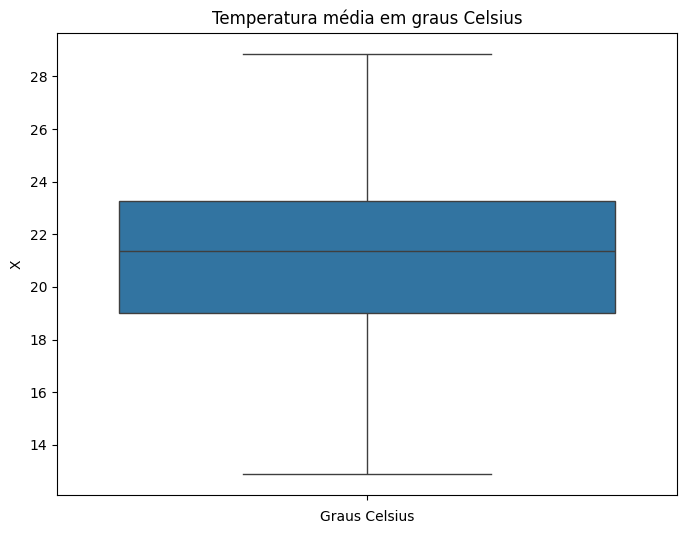

In [ ]:
ax = sns.boxplot(dados.X)
ax.figure.set_size_inches(8, 6)
ax.set_title('Temperatura média em graus Celsius')
ax.set_xlabel('Graus Celsius')

### Identificando se existe uma relação linear entre as variáveis $Y$ e $X$

#### Utilizando o método gráfico

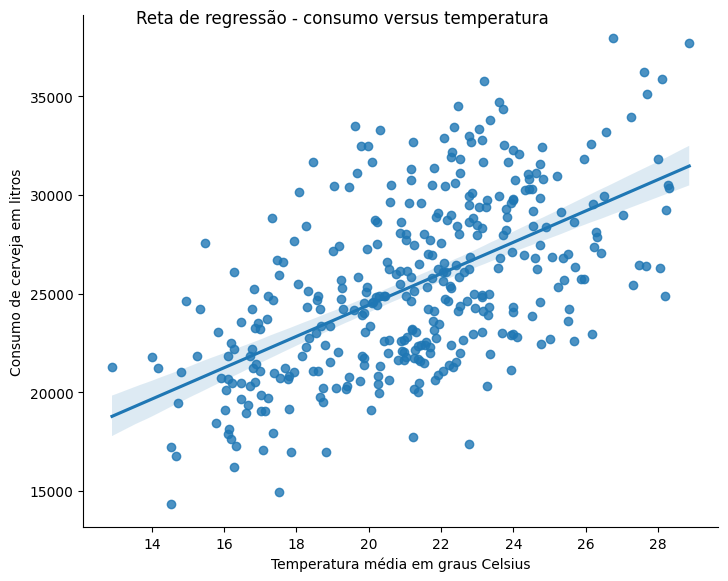

In [ ]:
ax = sns.lmplot(x='X', y='Y', data=dados)
ax.fig.set_size_inches(8, 6)
ax.fig.suptitle('Reta de regressão - consumo versus temperatura')
ax.set_xlabels('Temperatura média em graus Celsius')
ax.set_ylabels('Consumo de cerveja em litros')

#### Utilizando a matriz de correlação

In [ ]:
dados.corr()

,X,Y
X,1.000000,0.574615
Y,0.574615,1.000000


### Avaliando os resultados acima

* **É possível afirmar que existe uma relação linear entre as variáveis**, pois o coeficiente de correlação linear entre as variáveis é diferente de 0.

* **É possível quantificar a intensidade dessa relação** por meio do coeficiente de correlação. No caso da matriz de correlação fornecida, o valor é 0.574615 para a correlação entre X e Y.

* **Não é possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação**, visto que a correlação não implica causalidade. A existência de uma correlação entre duas variáveis indica apenas que elas têm uma associação linear, mas não determina se uma variável causa a outra.

### Preparando os dados para estimar um modelo de regressão linear simples

In [ ]:
Y = dados.Y
X = sm.add_constant(dados.X)

### Estimando o modelo de regressão linear simples

In [ ]:
regressão = sm.OLS(Y, X).fit()

### Visualizando o resultado da regressão

In [ ]:
print(regressão.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.87e-33
Time:                        06:58:18   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtendo o $Y$ previsto

In [ ]:
dados['Y_previsto'] = regressão.predict()
dados.head(10)

,X,Y,Y_previsto
0,27.30,25461.0,30229.200544
1,27.02,28972.0,30006.633434
2,24.82,30814.0,28257.891852
3,23.98,29799.0,27590.190521
4,23.82,28900.0,27463.009315
5,23.78,28218.0,27431.214014
6,24.00,29732.0,27606.088172
7,24.90,28397.0,28321.482455
8,28.20,24886.0,30944.594828
9,26.76,37937.0,29799.963974


### Utilizando o modelo estimado para fazer previsões
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [ ]:
regressão.predict([1, 42])

array([41913.97383817])

### Obtendo os resíduos da regressão

In [ ]:
dados['resíduos'] = regressão.resid
dados.head(10)

,X,Y,Y_previsto,resíduos
0,27.30,25461.0,30229.200544,-4768.200544
1,27.02,28972.0,30006.633434,-1034.633434
2,24.82,30814.0,28257.891852,2556.108148
3,23.98,29799.0,27590.190521,2208.809479
4,23.82,28900.0,27463.009315,1436.990685
5,23.78,28218.0,27431.214014,786.785986
6,24.00,29732.0,27606.088172,2125.911828
7,24.90,28397.0,28321.482455,75.517545
8,28.20,24886.0,30944.594828,-6058.594828
9,26.76,37937.0,29799.963974,8137.036026


### Plotando um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<Axes: title={'center': 'Resíduos versus Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos'>

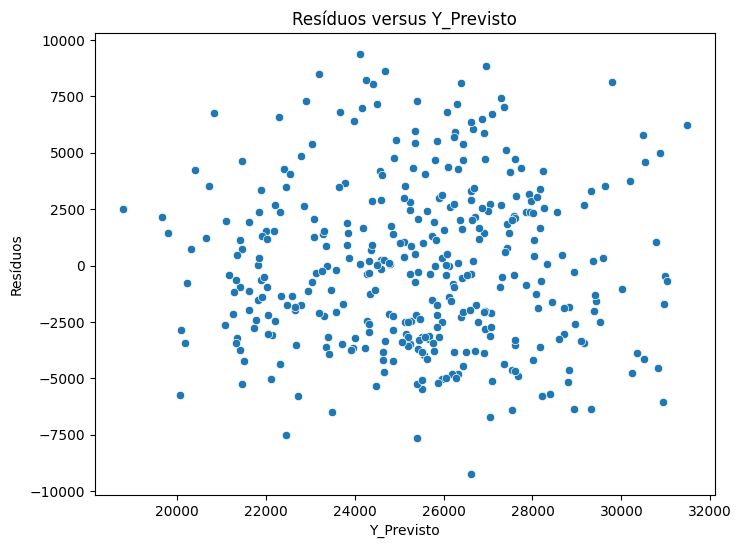

In [ ]:
ax = sns.scatterplot(x=dados.Y_previsto, y=dados.resíduos)
ax.figure.set_size_inches(8, 6)
ax.set_title('Resíduos versus Y_Previsto')
ax.set_xlabel('Y_Previsto')
ax.set_ylabel('Resíduos')
ax

### Obtendo o QQPlot dos resíduos

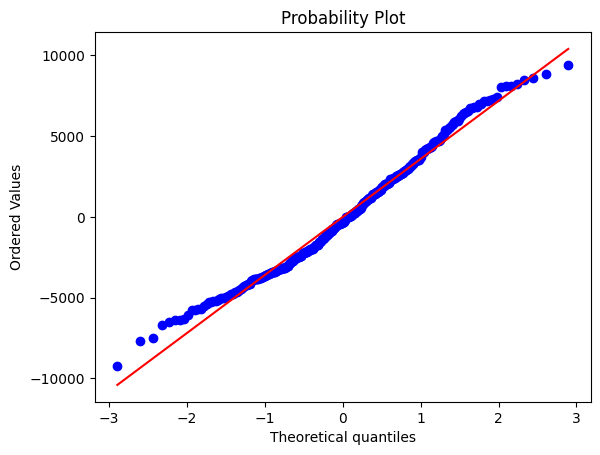

In [ ]:
(_, (_, _, _)) = probplot(dados.resíduos, plot=plt)

### Avaliando o comportamento dos resíduos a partir dos resultados acima
* **Há algum problema nos indicadores dos resíduos**, como indicado pelos resultados dos testes mais acima e agora confirmados (QQPlot, não tem está fortemente alinhado à reta de regressão).

* Uma investigação mais detalhada a partir de testes mais rigorosos é necessária.

### Obtendo o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [ ]:
dados.Y_previsto.apply(lambda y: (y - dados.Y.mean()) ** 2).sum()

2325899486.7377872

In [ ]:
SQR = regressão.ess
SQR

2325899486.7377863

In [ ]:
dados.Y.apply(lambda y: (y - dados.Y.mean()) ** 2).sum()

7044294174.805479

In [ ]:
SQT = regressão.ssr + regressão.ess
SQT

7044294174.805479

In [ ]:
R2 = SQR / SQT
R2

0.33018204933243206

In [ ]:
regressão.rsquared

0.330182049332432